In [1]:
!pip install pandas

In [2]:
import pandas as pd

In [8]:
dataset=pd.read_excel("E:/Bahan Statistika/Data BBM.xlsx")
dataset

,No,Provinsi,Tangki (Y),mopen,bus,truk,sepmor,GAS,BBM,Penduduk,Klaster
0,1,Aceh,767985,80976,50190,77803,1106997,538.14,1473.9,4026.5,2
1,2,sumatera Utara,2614916,444759,54188,172784,2432626,1158.57,5920.3,12437.7,1
2,3,sumatera Barat,918129,44873,77802,107680,817060,602.35,1419.6,4935.3,2
3,4,kepulauan riau,1915129,381985,48813,129368,1039382,875.65,2924.0,6175.3,1
4,5,sumatera Selatan,1143511,71734,32452,137825,1250911,383.26,721.9,2658.7,1
5,6,jambi,604015,327899,55908,94402,871458,1022.77,2264.2,6757.7,2
6,7,bengkulu,246223,25800,4189,35350,338681,194.64,399.2,1619.3,3
7,8,bangka belitung,399893,71629,15756,64578,866109,579.79,1238.3,7288.4,3
8,9,lampung,1148281,8941,18161,30494,291378,266.54,391.3,972.1,1
9,10,banten,1705271,3104773,774277,1099729,6169131,4776.93,3237.9,8680.6,1


In [81]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Mengimpor library yang dibutuhkan untuk uji homogenitas varian
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
datavar=pd.read_excel("E:/Bahan Statistika/Data perlakuan dan kelompok.xlsx")
datavar

,Data,Kelompok
0,3,1
1,1,1
2,4,1
3,2,1
4,1,1
5,5,1
6,3,1
7,4,2
8,2,2
9,1,2


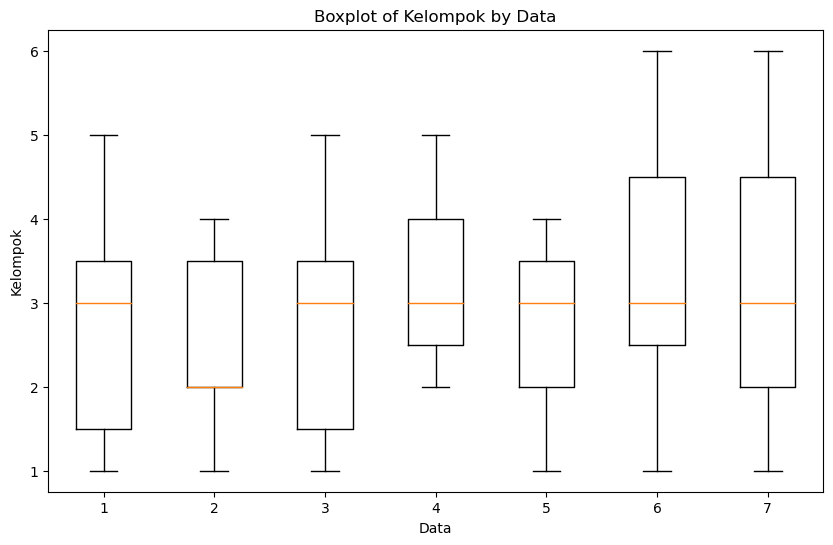

In [7]:
plt.figure(figsize=(10, 6))
plt.boxplot([datavar["Data"][datavar["Kelompok"] == 1],
             datavar["Data"][datavar["Kelompok"] == 2],
             datavar["Data"][datavar["Kelompok"] == 3],
             datavar["Data"][datavar["Kelompok"] == 4],
             datavar["Data"][datavar["Kelompok"] == 5],
             datavar["Data"][datavar["Kelompok"] == 6],
             datavar["Data"][datavar["Kelompok"] == 7]]),
plt.xlabel("Data")
plt.ylabel("Kelompok")
plt.title("Boxplot of Kelompok by Data")
plt.show()

In [8]:
# Melakukan uji homogenitas varians Levene pada variabel sales berdasarkan variabel dose
lv = levene(datavar["Data"][datavar["Kelompok"] == 1],
             datavar["Data"][datavar["Kelompok"] == 2],
             datavar["Data"][datavar["Kelompok"] == 3],
             datavar["Data"][datavar["Kelompok"] == 4],
             datavar["Data"][datavar["Kelompok"] == 5],
             datavar["Data"][datavar["Kelompok"] == 6],
             datavar["Data"][datavar["Kelompok"] == 7])
print("Levene statistic:", lv[0])
print("p-value:", lv[1])

Levene statistic: 0.47008547008547025
p-value: 0.8265492006456303


In [12]:
# Membuat model ANOVA dengan variabel kelompok sebagai variabel dependen dan variabel data sebagai variabel independen
model = ols("Data ~ C(Kelompok)", data=datavar).fit()
# Melakukan uji ANOVA dengan menggunakan fungsi anova_lm
anova_table = anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Kelompok),5.346939,6.0,0.432343,0.853116
Residual,86.571429,42.0,NaN,NaN


In [14]:
# Menentukan hipotesis nol dan alternatif berdasarkan p-value
if anova_table["PR(>F)"][0] > 0.05:
    print("H0: Mean antar kelompok sama")
    print("H1: Mean antar kelompok tidak sama")
    print("Kesimpulan: Tidak ada bukti untuk menolak H0")
else:
    print("H0: Mean antar kelompok sama")
    print("H1: Mean antar kelompok tidak sama")
    print("Kesimpulan: Ada bukti untuk menolak H0")

H0: Mean antar kelompok sama
H1: Mean antar kelompok tidak sama
Kesimpulan: Tidak ada bukti untuk menolak H0


In [1]:
# ANALISIS CLUSTER
# Mengimpor library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [9]:
# Melakukan normalisasi data dengan MinMaxScaler
scaler = MinMaxScaler()
dataset_scaled = scaler.fit_transform(dataset[["Tangki (Y)", "mopen", "bus", "truk", "sepmor", "GAS", "BBM", "Penduduk"]])
dataset_scaled

array([[1.24815110e-01, 2.60362749e-02, 6.46127652e-02, 7.05437440e-02,
        1.60748259e-01, 7.39501441e-02, 7.26495474e-02, 8.25162245e-02],
       [4.81031767e-01, 1.43210624e-01, 6.97774459e-02, 1.56930317e-01,
        3.53417316e-01, 1.60740565e-01, 3.35552573e-01, 3.02447927e-01],
       [1.53773309e-01, 1.44075139e-02, 1.00282391e-01, 9.77173011e-02,
        1.18608348e-01, 8.29323224e-02, 6.94389423e-02, 1.06279056e-01],
       [3.46064199e-01, 1.22991145e-01, 6.28339345e-02, 1.17442846e-01,
        1.50920986e-01, 1.21163584e-01, 1.58389849e-01, 1.38701934e-01],
       [1.97242622e-01, 2.30594306e-02, 4.16985315e-02, 1.25134608e-01,
        1.81664952e-01, 5.22843634e-02, 2.81859195e-02, 4.67516983e-02],
       [9.31902987e-02, 1.05570068e-01, 7.19993696e-02, 8.56407710e-02,
        1.26514641e-01, 1.41743838e-01, 1.19377746e-01, 1.53930228e-01],
       [2.41831350e-02, 8.26410877e-03, 5.18793340e-03, 3.19321357e-02,
        4.90799731e-02, 2.58987774e-02, 9.10558338e-03, 1.

In [10]:
# Melakukan K-Means clustering dengan 3 cluster
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset_scaled)
kmeans.labels_

D:\Program Statistika Rafif\anaconda\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Program Statistika Rafif\anaconda\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
# Menghitung nilai siluet untuk K-Means clustering
silhouette_score(dataset_scaled, kmeans.labels_)

0.7206308857837106

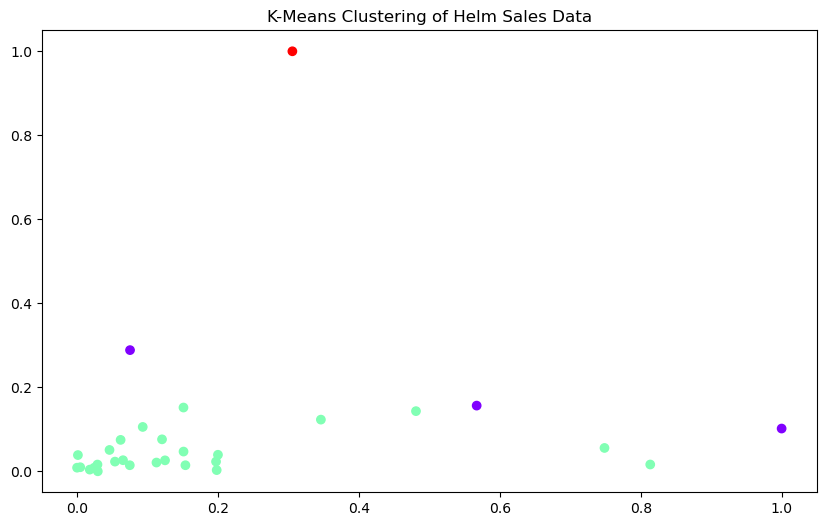

In [13]:
# Membuat plot data dan label cluster untuk K-Means clustering
plt.figure(figsize=(10, 6))
plt.scatter(dataset_scaled[:, 0], dataset_scaled[:, 1], c=kmeans.labels_, cmap="rainbow")
plt.title("K-Means Clustering of Helm Sales Data")
plt.show()

In [14]:
# Melakukan hierarchical clustering dengan 3 cluster
hier = AgglomerativeClustering(n_clusters=3)
hier.fit(dataset_scaled)
hier.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [15]:
# Menghitung nilai siluet untuk hierarchical clustering
silhouette_score(dataset_scaled, hier.labels_)

0.7206308857837106